In [5]:
import pandas as pd
from tqdm import tqdm

# Load the data
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

tqdm.pandas()

# Display the first few rows of the dataframe to understand its structure
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944235 entries, 0 to 944234
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           944235 non-null  int64  
 1   Date Rptd       944235 non-null  object 
 2   DATE OCC        944235 non-null  object 
 3   TIME OCC        944235 non-null  int64  
 4   AREA            944235 non-null  int64  
 5   AREA NAME       944235 non-null  object 
 6   Rpt Dist No     944235 non-null  int64  
 7   Part 1-2        944235 non-null  int64  
 8   Crm Cd          944235 non-null  int64  
 9   Crm Cd Desc     944235 non-null  object 
 10  Mocodes         811136 non-null  object 
 11  Vict Age        944235 non-null  int64  
 12  Vict Sex        817640 non-null  object 
 13  Vict Descent    817630 non-null  object 
 14  Premis Cd       944225 non-null  float64
 15  Premis Desc     943668 non-null  object 
 16  Weapon Used Cd  324477 non-null  float64
 17  Weapon Des

In [9]:
# Convert date columns to datetime format
for col in ['Date Rptd', 'DATE OCC']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle missing values
# For simplicity, we will fill missing values with a placeholder or drop rows with critical missing data
# Fill missing values in 'Mocodes' with an empty string
# Drop rows where 'LAT' or 'LON' are missing

# Fill missing 'Mocodes' with an empty string
if 'Mocodes' in df.columns:
    df['Mocodes'] = df['Mocodes'].fillna('')

# Drop rows with missing 'LAT' or 'LON'
df = df.dropna(subset=['LAT', 'LON'])

/tmp/ipykernel_510/2786826559.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipykernel_510/2786826559.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


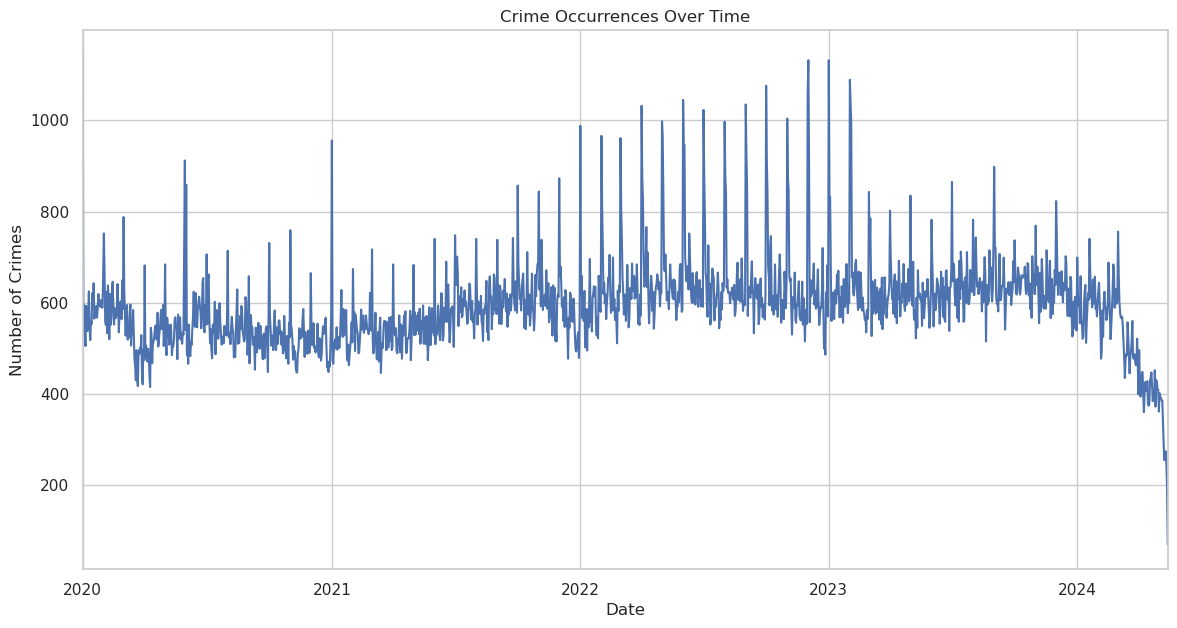

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation style
sns.set(style='whitegrid')

# Analysis 1: Crime occurrences over time
plt.figure(figsize=(14, 7))
df['DATE OCC'].value_counts().sort_index().plot(kind='line')
plt.title('Crime Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

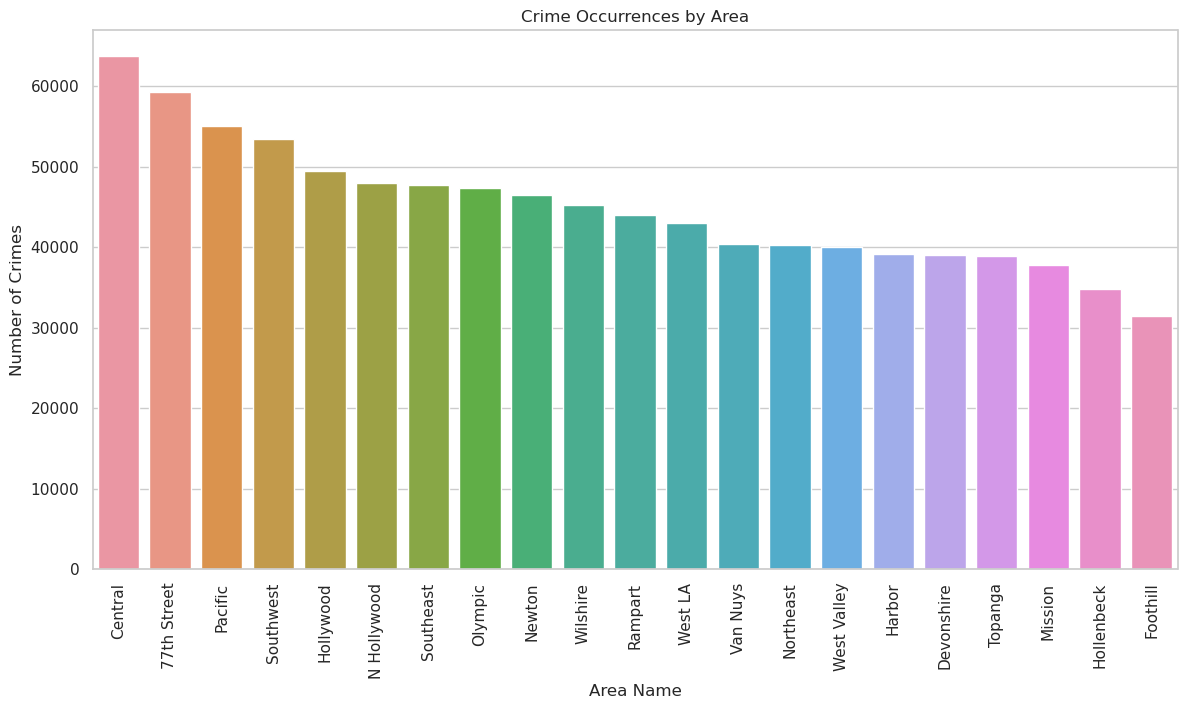

In [13]:
# Analysis 2: Crime occurrences by area
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='AREA NAME', order=df['AREA NAME'].value_counts().index)
plt.title('Crime Occurrences by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

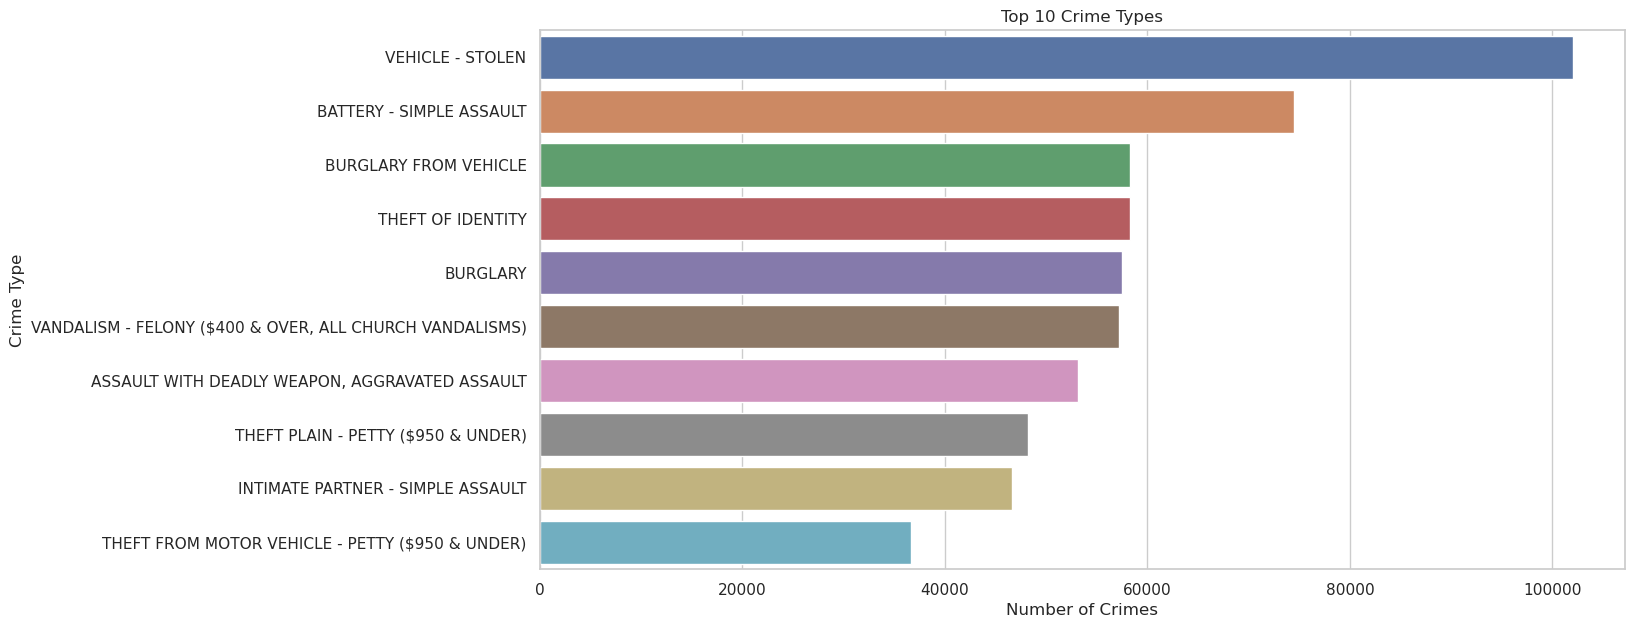

In [15]:
# Analysis 3: Top 10 crime types
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Crm Cd Desc', order=df['Crm Cd Desc'].value_counts().iloc[:10].index)
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()

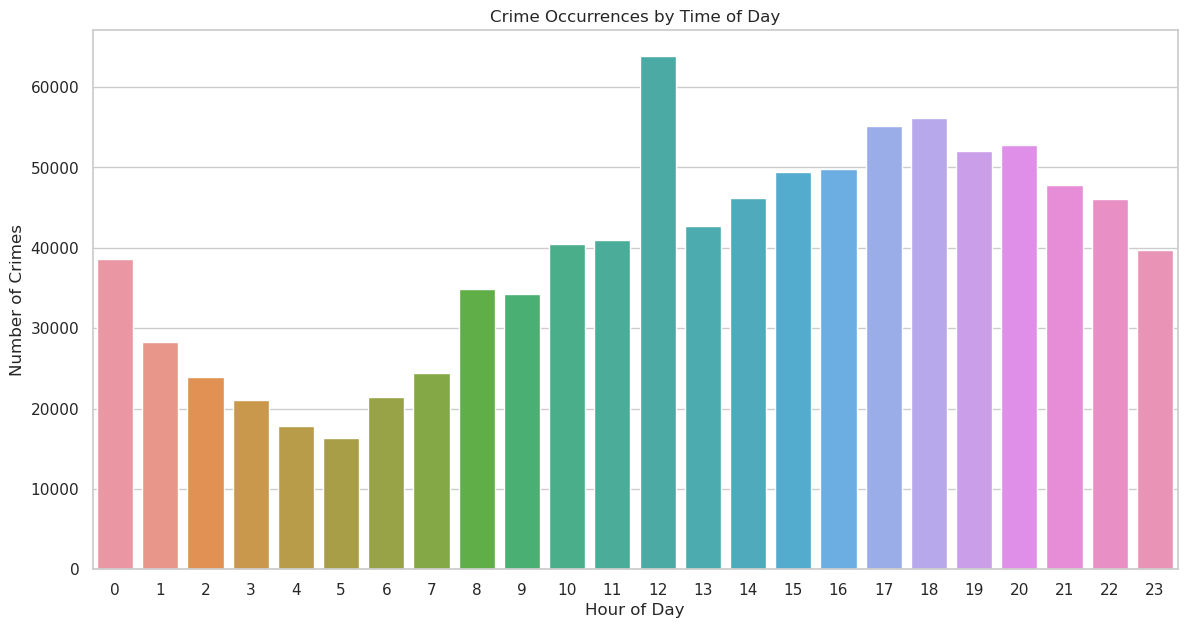

In [17]:
# Analysis 4: Crime occurrences by time of day
plt.figure(figsize=(14, 7))
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: '{:04d}'.format(x))
df['HOUR OCC'] = df['TIME OCC'].str[:2].astype(int)
sns.countplot(data=df, x='HOUR OCC', order=sorted(df['HOUR OCC'].unique()))
plt.title('Crime Occurrences by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


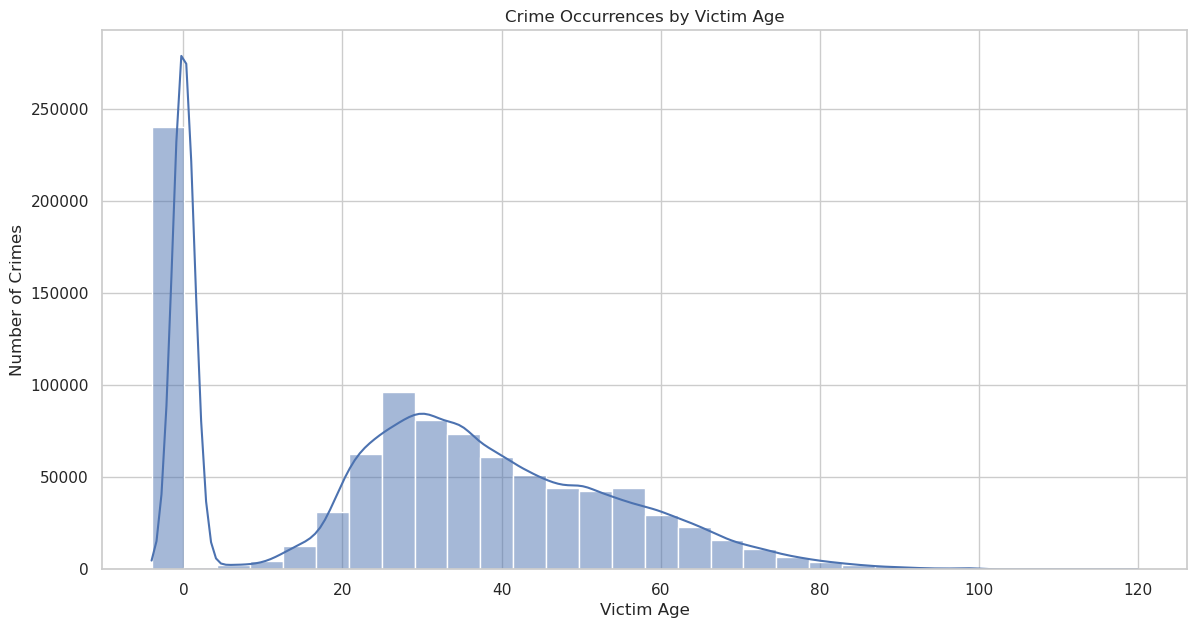

In [19]:
# Analysis 5: Crime occurrences by victim's age
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='Vict Age', bins=30, kde=True)
plt.title('Crime Occurrences by Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.show()

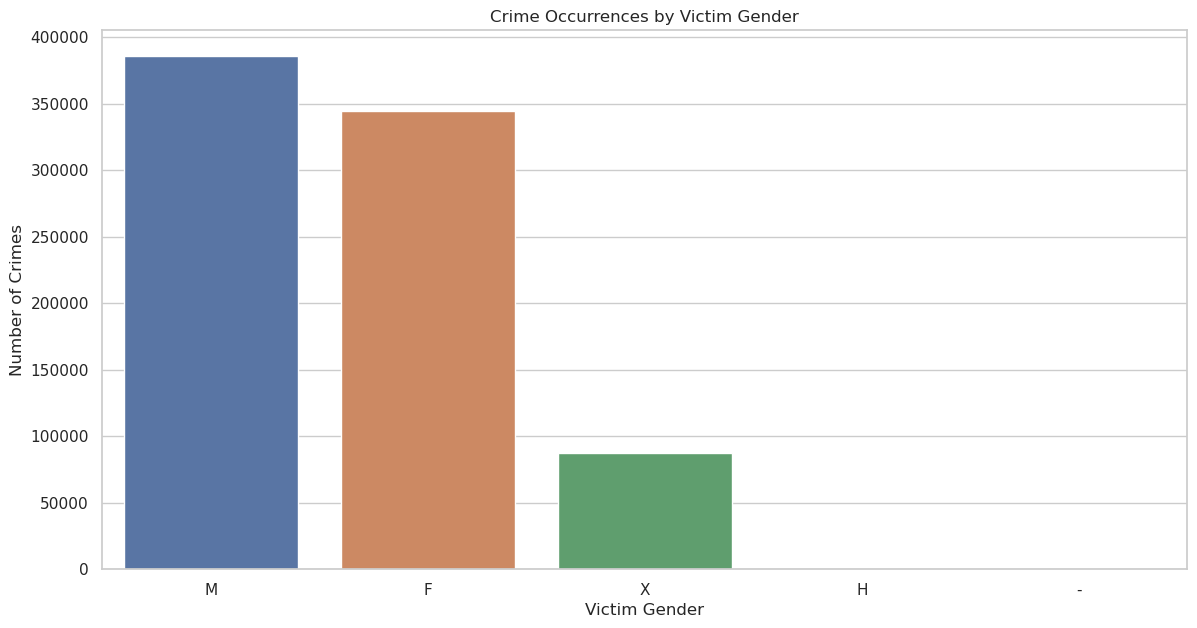

In [21]:
# Analysis 6: Crime occurrences by victim's gender
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Vict Sex', order=df['Vict Sex'].value_counts().index)
plt.title('Crime Occurrences by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.show()


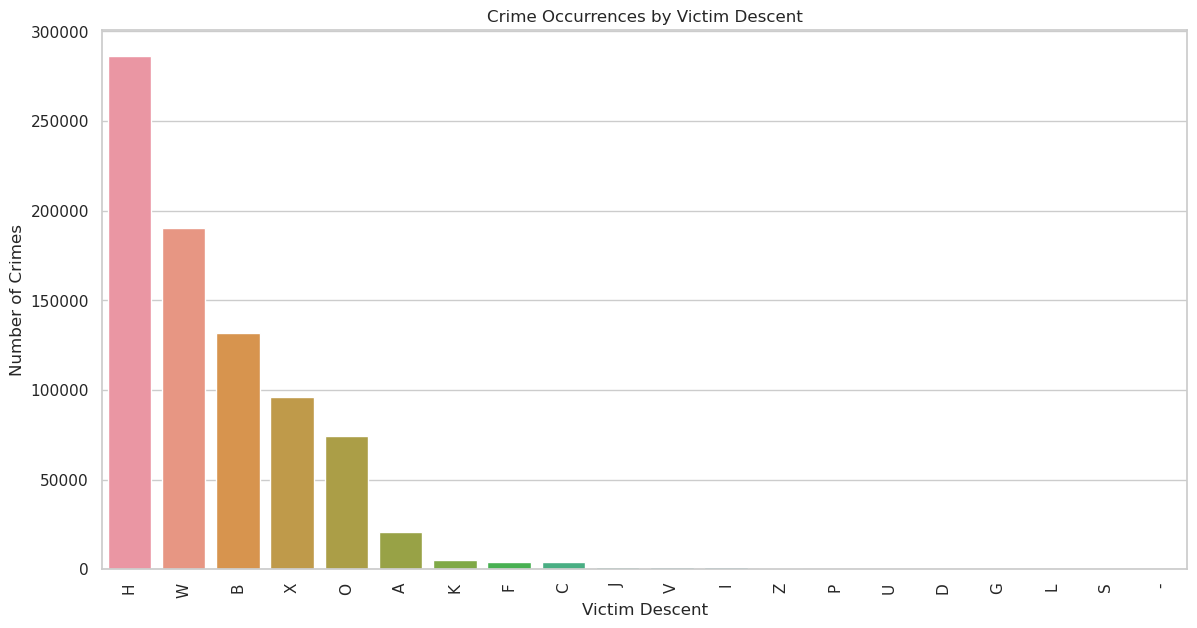

In [23]:
# Analysis 7: Crime occurrences by victim's descent
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Vict Descent', order=df['Vict Descent'].value_counts().index)
plt.title('Crime Occurrences by Victim Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

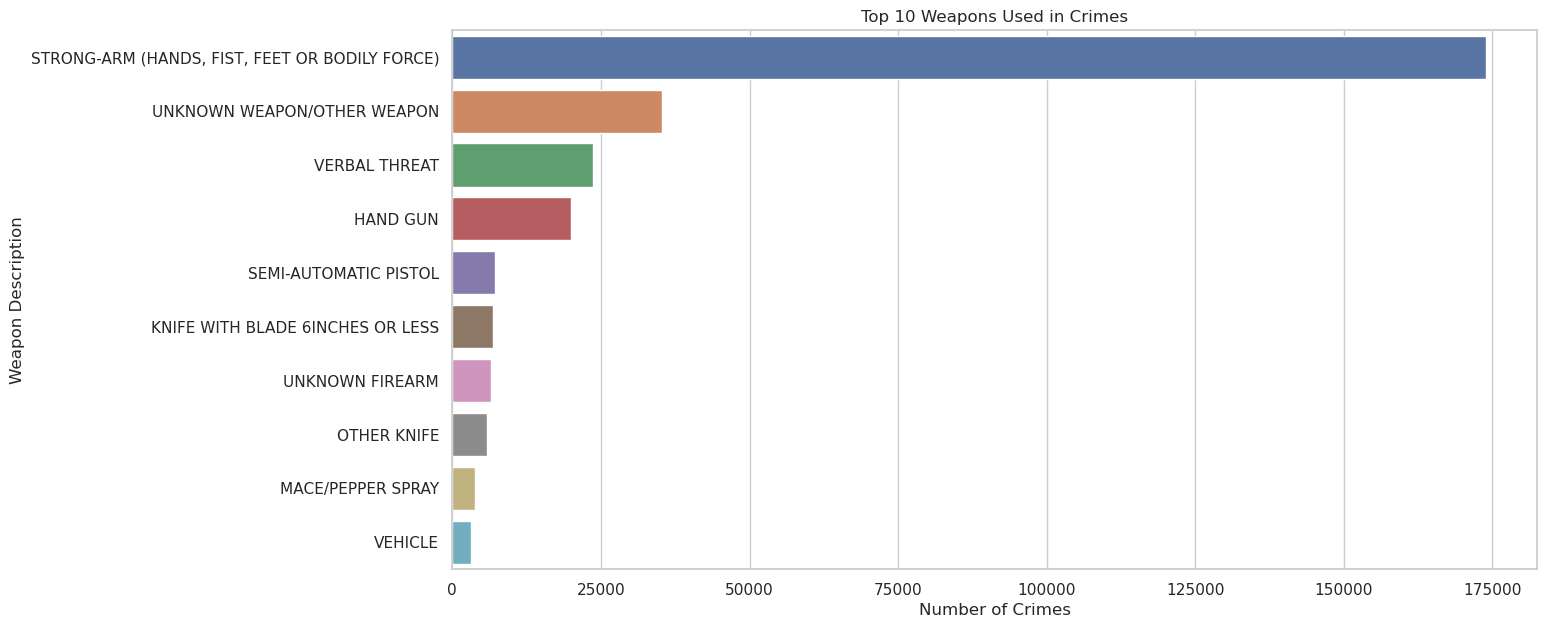

In [25]:
# Analysis 8: Crime occurrences by weapon used
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Weapon Desc', order=df['Weapon Desc'].value_counts().iloc[:10].index)
plt.title('Top 10 Weapons Used in Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Weapon Description')
plt.show()

In [30]:
# First, we need to create a pivot table for the heatmap
# We will bin the time of day into hourly intervals for better visualization

df['TIME OCC'] = df['TIME OCC'].apply(lambda x: '{:0>4}'.format(x))  # Ensure time is in HHMM format

df['HOUR OCC'] = df['TIME OCC'].str[:2].astype(int)  # Extract the hour part

# Create a pivot table
pivot_table = df.pivot_table(index='AREA NAME', columns='HOUR OCC', values='DR_NO', aggfunc='count', fill_value=0)

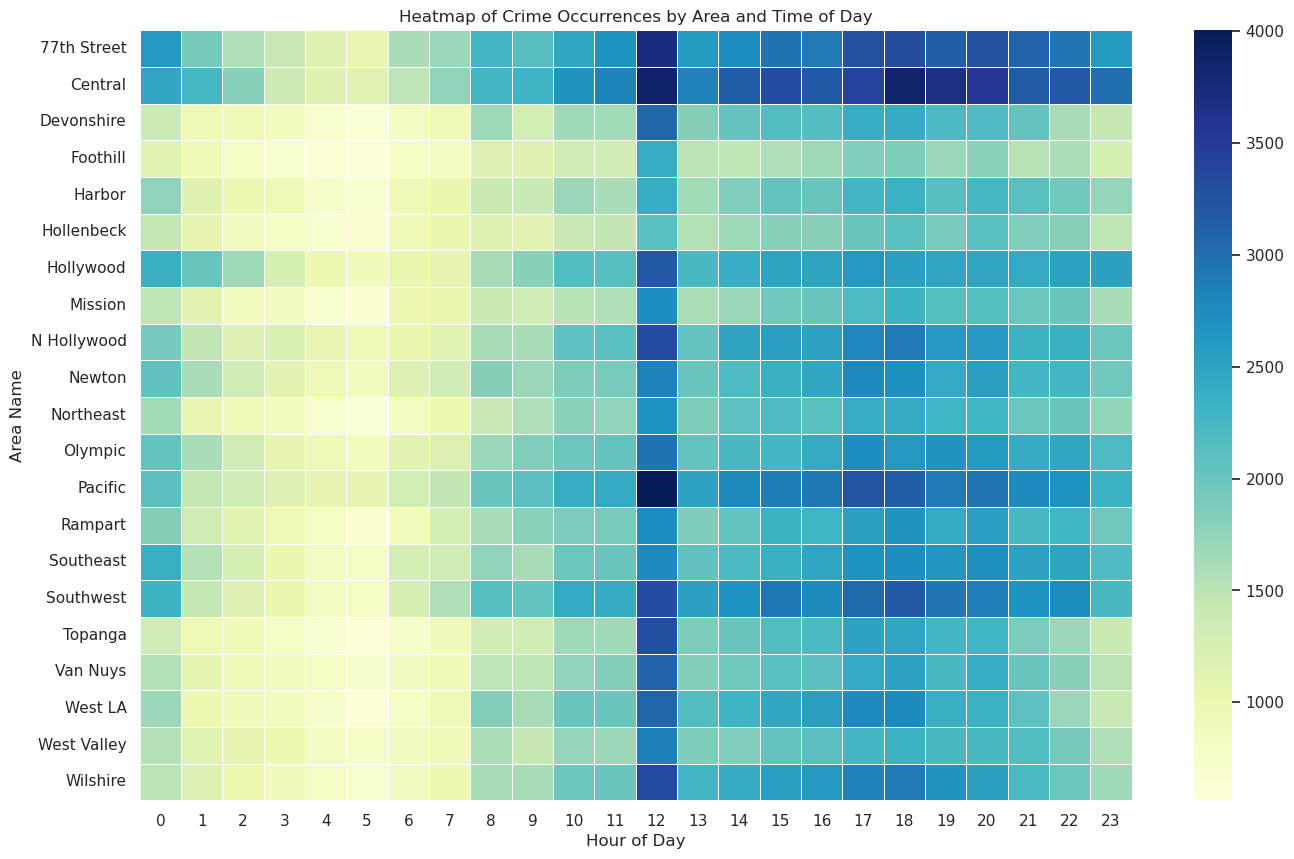

In [32]:
# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Crime Occurrences by Area and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Area Name')
plt.show()